In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import re

Query 1:
SELECT 
DATE, Locations, V2Locations, V2Tone
FROM `gdelt-bq.gdeltv2.gkg_partitioned` 
WHERE 
DATE(_PARTITIONTIME) > "2023-01-01" 
and (Themes like "%DEFOREST%" or V2Themes like "%DEFOREST%")
and (Locations like "%India%" or V2Locations like "%India%")
;
output "bquxjob_10f9d47a_18760d2fdc0.json"

In [50]:
deforest_df = df = pd.read_json('/home/naman/Downloads/bquxjob_10f9d47a_18760d2fdc0.json', convert_dates = False)

In [51]:
deforest_df["DATE"] = pd.to_datetime(deforest_df["DATE"], format = '%Y%m%d%H%M%S')
deforest_df[["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Reference Density", "Self/Group Reference Density", "Word Count"]] =  deforest_df["V2Tone"].str.split(",", expand = True)
deforest_df["Tone"] = deforest_df["Tone"].astype(float)
deforest_df["Positive Score"] = deforest_df["Positive Score"].astype(float)
deforest_df["Negative Score"] = -deforest_df["Negative Score"].astype(float)

In [52]:
deforest_df.head()

,DATE,Locations,V2Locations,V2Tone,Tone,Positive Score,Negative Score,Polarity,Activity Reference Density,Self/Group Reference Density,Word Count
0,2023-02-27 03:45:00,1#Namibia#WA#WA#-22#17#WA;1#South Africa#SF#SF...,"5#Himachal Pradesh, Himachal Pradesh, India#IN...","-0.206611570247934,3.20247933884297,3.40909090...",-0.206612,3.202479,-3.409091,6.61157024793388,21.2809917355372,0.103305785123967,883
1,2023-02-27 21:15:00,"4#Jacareacanga, ParáR, Brazil#BR#BR16#-6.26667...",1#Central African#CT#CT##7#21#CT#15910;4#Campi...,"-3.96551724137931,2.13793103448276,6.103448275...",-3.965517,2.137931,-6.103448,8.24137931034483,22.7931034482759,0.137931034482759,2613
2,2023-04-08 12:15:00,"4#Kodagu, Karnataka, India#IN#IN19#12.4167#75....","4#Kodagu, Karnataka, India#IN#IN19#17689#12.41...","-0.570884871550904,1.61750713606089,2.18839200...",-0.570885,1.617507,-2.188392,3.80589914367269,23.977164605138,0.0951474785918173,964
3,2023-02-28 03:30:00,"1#China#CH#CH#35#105#CH;4#Dongying, Shandong, ...","4#Zibo, Shandong, China#CH#CH25#13240#36.7906#...","5.01882057716437,6.52446675031368,1.5056461731...",5.018821,6.524467,-1.505646,8.03011292346299,29.7992471769134,0.0627352572145546,1560
4,2023-02-28 04:30:00,"1#China#CH#CH#35#105#CH;4#Dongying, Shandong, ...","4#Zibo, Shandong, China#CH#CH25#13240#36.7906#...","5.05933791380387,6.49594003747658,1.4366021236...",5.059338,6.495940,-1.436602,7.93254216114928,29.7938788257339,0.0624609618988132,1566


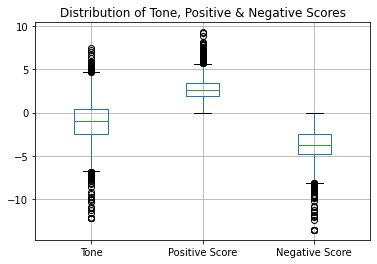

In [53]:
deforest_df.boxplot(column = ["Tone", "Positive Score", "Negative Score"])
plt.title('Distribution of Tone, Positive & Negative Scores')
plt.show()

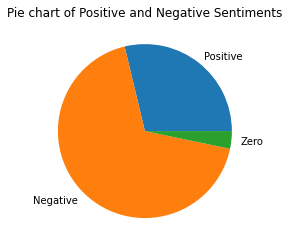

In [89]:
plt.pie([len(deforest_df[deforest_df["Tone"] > 0]), 
         len(deforest_df[deforest_df["Tone"] < 0]),
         len(deforest_df[deforest_df["Tone"] == 0])
        ],
       labels = ["Positive", "Negative", "Zero"]
       )
plt.title("Pie chart of Positive and Negative Sentiments")
plt.show()

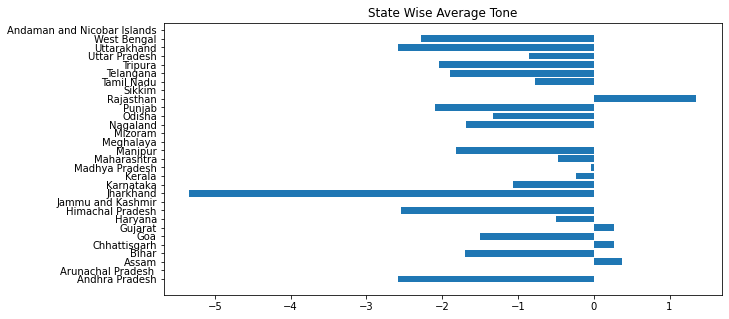

In [75]:
state_list = ["Andhra Pradesh","Arunachal Pradesh ","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","Andaman and Nicobar Islands","Chandigarh","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","National Capital Territory of Delhi","Puducherry"]
state_dict = {}
for i in state_list:
    state_dict[i] = deforest_df[deforest_df["Locations"].str.contains(i)]["Tone"].mean()
plt.subplots(figsize=(10, 5))
plt.barh(*zip(*state_dict.items()))
plt.title("State Wise Average Tone")
plt.show()